In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('./models/')
from SIRH import *
import os
from SIRD_h import SIRD_h
from SIRD import *
from Arima import *

In [2]:
df=pd.read_csv('hopitalized_and_infectious.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
n_hospitalized=np.array(df['hospitalized'])
n_infectious=np.array(df['n_infectious'])

In [15]:
# importing mobility from the csv file
df_mobility=pd.read_csv('mobility_bis.csv')
df_mobility.drop(columns=['Unnamed: 0'], inplace=True)
mobility=np.array(df_mobility['mobility'])

relier_les_points=[]
for i in range(len(mobility)): 
    if i + 7 < len(mobility): 
        if i % 7 ==0:
            relier_les_points.append(mobility[i])
        else: 
            decalage=i-7*(i//7)
            res = (1-decalage/7)*mobility[7*(i//7)] + (decalage/7)*mobility[7*(i//7)+7]

            relier_les_points.append(res)
    else:
        relier_les_points.append(mobility[i])
mobility_smoothed=np.array(relier_les_points)
data3D=np.array([n_hospitalized, n_infectious, mobility_smoothed])
split=300
data3D_train=data3D[:, :split]
data_train=n_hospitalized[:split]
dates_of_pandemic_train=[i for i in range(split)]

In [16]:
mysirh=SIRH_model_2()
mysirh.choose_model(True, True, True)
mysirh.train( data_train)


gamma_i and gamma_h constants


delta-method


c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\scipy\stats\_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\scipy\stats\_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


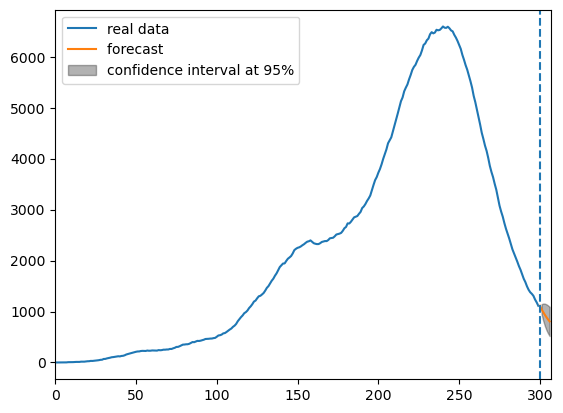

In [17]:
mysirh.plot(7, 0.05)

In [14]:
mysirh.beta, mysirh.gamma_h, mysirh.gamma_i,  mysirh.h

(9.999999999953316,
 2.461203013031013e-44,
 9.761711567884106,
 0.0934266777620461)

c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


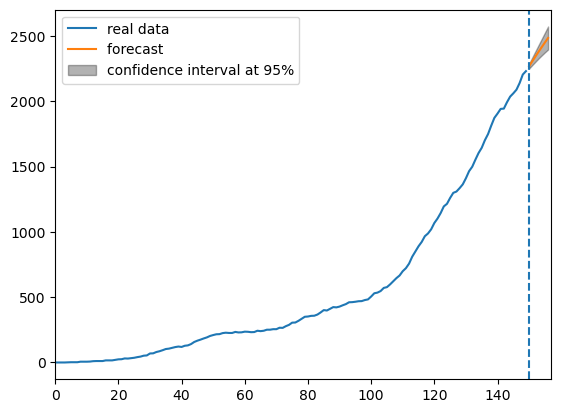

In [15]:
myarima=ARIMA_Model()
myarima.train(dates_of_pandemic_train, data_train)
myarima.plot(7, 0.05)